# 13.Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
rcParams['figure.figsize'] = 16, 10

In [3]:
# 14.Import the dataset from file on blackboard.
# 15.Also assigning data to variable MAC270

In [4]:
MAC270 = pd.read_table('chipotle.tsv')

In [5]:
# 16. Showing the first 5 Rows 

In [6]:
MAC270.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
# 17. Creating a histogram of the top 5 items bought

In [8]:
descriptions = MAC270.groupby(['item_name'])['order_id'].count().reset_index(name = 'order_num')

In [9]:
Num_sold = descriptions.sort_values( 'order_num', ascending = False)[:5]

In [10]:
Num_sold.head(5)

,item_name,order_num
17,Chicken Bowl,726
18,Chicken Burrito,553
25,Chips and Guacamole,479
39,Steak Burrito,368
10,Canned Soft Drink,301


In [11]:
y = Num_sold['order_num'][:5]
x = Num_sold['item_name'][:5]
color = ['green', 'orange', 'purple', 'pink', 'red']

Text(0.5, 1.0, 'Top 5 selling items')

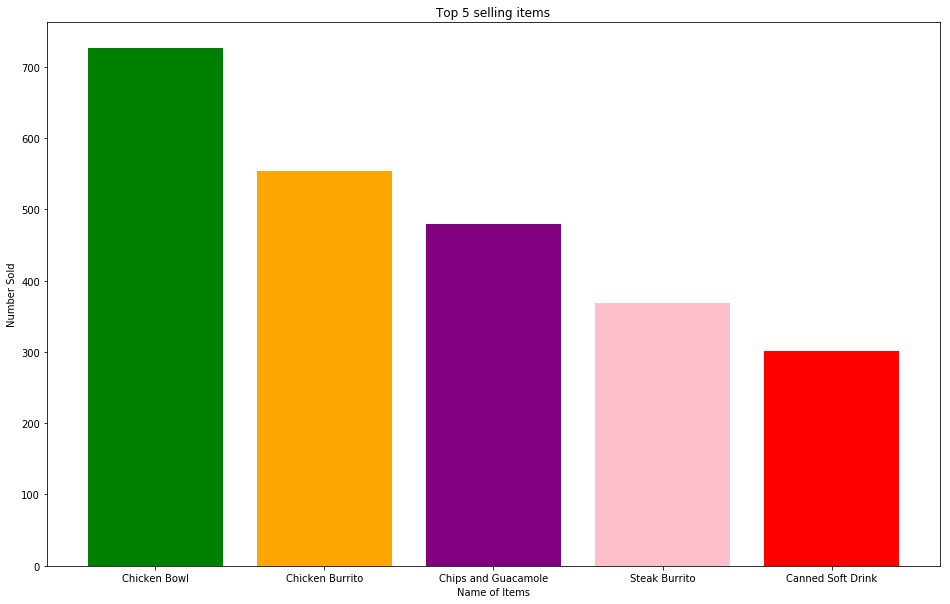

In [12]:
plt.bar(x, y, color = color)
plt.xlabel('Name of Items')
plt.ylabel('Number Sold')
plt.title('Top 5 selling items')

In [13]:
# 18. Creating a scatterplot with the number of items ordered per order price.

In [14]:
# Removing '$' from item_price
MAC270['item_price'] = MAC270['item_price'].str.replace('$', "")

In [15]:
# Changing the data type of item_price to float
MAC270['item_price'] = MAC270['item_price'].astype(float)

In [16]:
# grouping and counting the number of items sold by item price.
items = MAC270.groupby(['item_price'])['item_price'].count().reset_index(name ="Num_sold")

Text(0.5, 1.0, 'Number of Items Ordered per Order Price')

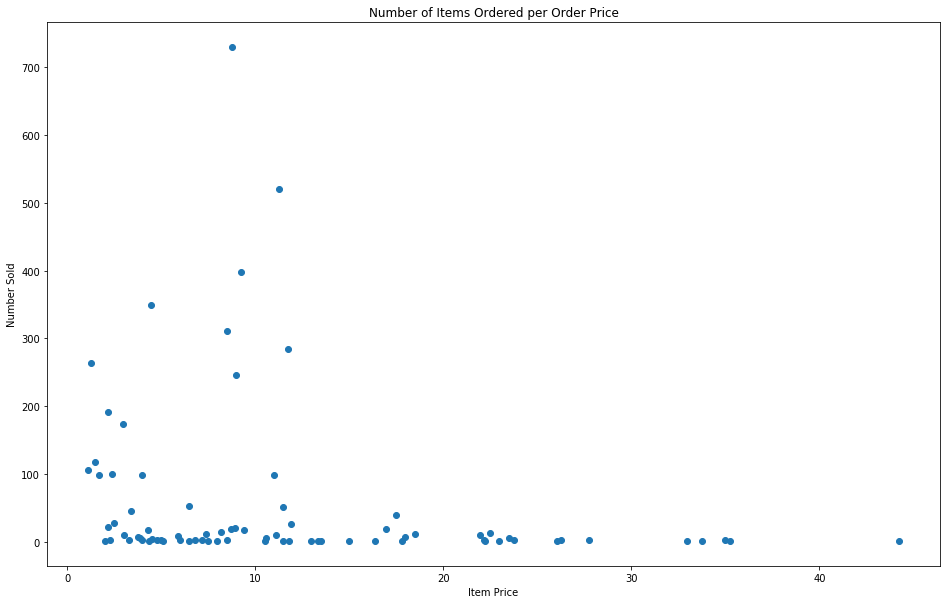

In [17]:
plt.scatter(items['item_price'], items['Num_sold'])
plt.xlabel('Item Price')
plt.ylabel('Number Sold')
plt.title('Number of Items Ordered per Order Price')

In [18]:
# 19.Bonus Finding the low budget food and plotting them on the graph.

In [19]:
# Making group and calculating the mean of the item prices and also assigning the mean to 'mean_price'
order_Price = MAC270.groupby(['item_name'])['item_price'].mean().reset_index(name = 'mean_price')

In [20]:
order_Price = order_Price.sort_values('mean_price', ascending = True)

In [21]:
order_Price.head()

,item_name,mean_price
9,Canned Soda,1.320577
10,Canned Soft Drink,1.457641
37,Side of Chips,1.840594
6,Bottled Water,1.867654
23,Chips,2.342844


In [22]:
new_y = order_Price['mean_price'][:5]
new_x = order_Price['item_name'][:5]

In [23]:
new_y

9     1.320577
10    1.457641
37    1.840594
6     1.867654
23    2.342844
Name: mean_price, dtype: float64

In [24]:
new_x

9           Canned Soda
10    Canned Soft Drink
37        Side of Chips
6         Bottled Water
23                Chips
Name: item_name, dtype: object

Text(0.5, 1.0, 'Low budget Items')

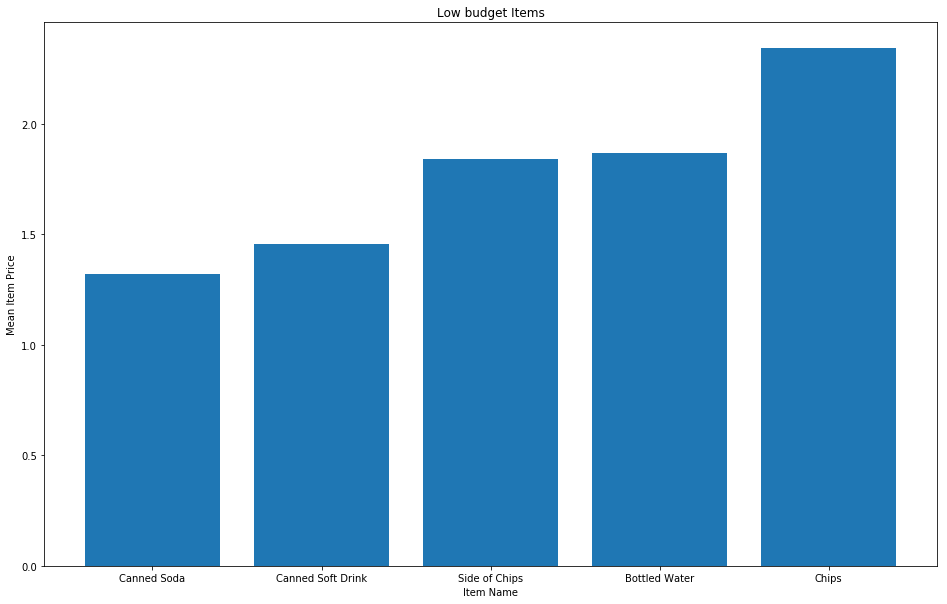

In [25]:
plt.bar(new_x, new_y)
plt.xlabel('Item Name')
plt.ylabel('Mean Item Price')
plt.title('Low budget Items')